In [1]:
import tensorflow as tf
Adam = tf.keras.optimizers.Adam
to_categorical = tf.keras.utils.to_categorical
ImageDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator
fashion_mnist = tf.keras.datasets.fashion_mnist
load_img = tf.keras.preprocessing.image.load_img
img_to_array = tf.keras.preprocessing.image.img_to_array

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import plotly.graph_objs as go
from plotly import subplots
import plotly

import warnings
warnings.filterwarnings('ignore')

import numpy as np

In [2]:
IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 10
VAL_SIZE = 0.2
RANDOM_STATE = 99
BATCH_SIZE = 256

In [3]:
(train_data, y), (test_data, y_test) = fashion_mnist.load_data()

print("Fashion MNIST train -  rows:",train_data.shape[0]," columns:", train_data.shape[1], " rows:", train_data.shape[2])
print("Fashion MNIST test -  rows:",test_data.shape[0]," columns:", test_data.shape[1], " rows:", train_data.shape[2])

4431872/4422102 [==============================] - 0s 0us/step
Fashion MNIST train -  rows: 60000  columns: 28  rows: 28
Fashion MNIST test -  rows: 10000  columns: 28  rows: 28


In [4]:
y_test_1 = y_test
print(y_test)
print(y_test_1)

[9 2 1 ... 8 1 5]
[9 2 1 ... 8 1 5]


In [5]:
#ขยายมิติ Dataset
print(train_data.shape, test_data.shape)
train_data = train_data.reshape((train_data.shape[0], 28, 28, 1))
test_data = test_data.reshape((test_data.shape[0], 28, 28, 1))

print(train_data.shape, test_data.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [6]:
#ทำ Scaling ข้อมูล
train_data = train_data / 255.0
test_data = test_data / 255.0

In [7]:
#เข้ารหัส one-Hot Encoding
y = to_categorical(y)
y_test = to_categorical(y_test)

print(y.shape, y_test.shape)
y[:10]

(60000, 10) (10000, 10)


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [8]:
#แบ่งข้อมูลในการเทรน 80:20
x_train, x_val, y_train, y_val = train_test_split(train_data, y, test_size=VAL_SIZE, random_state=RANDOM_STATE)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [9]:
# model = Sequential()
model = tf.keras.Sequential()

#1. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 31, kernel_size = (3,3), padding = 'Same', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Activation("relu"))

#2. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 31, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.Activation("relu"))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

#3. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 62, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.Activation("relu"))

#4. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 62, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.Activation("relu"))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

#FULLY CONNECTED LAYER
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.Activation("relu"))

#OUTPUT LAYER
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [10]:
optimizer = Adam()
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 31)        310       
                                                                 
 activation (Activation)     (None, 28, 28, 31)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 31)        8680      
                                                                 
 activation_1 (Activation)   (None, 28, 28, 31)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 31)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 62)        17360     
                                                        

In [11]:
NO_EPOCHS = 20

history = model.fit(x_train, y_train, batch_size=NO_EPOCHS,
                              shuffle=True,
                              epochs=NO_EPOCHS, validation_data = (x_val, y_val),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // BATCH_SIZE)

Epoch 1/20
187/187 [==============================] - 16s 26ms/step - loss: 0.7887 - accuracy: 0.7147 - val_loss: 0.4899 - val_accuracy: 0.8230
Epoch 2/20
187/187 [==============================] - 4s 23ms/step - loss: 0.4819 - accuracy: 0.8254 - val_loss: 0.4924 - val_accuracy: 0.8157
Epoch 3/20
187/187 [==============================] - 5s 26ms/step - loss: 0.4224 - accuracy: 0.8468 - val_loss: 0.4021 - val_accuracy: 0.8548
Epoch 4/20
187/187 [==============================] - 4s 23ms/step - loss: 0.3775 - accuracy: 0.8588 - val_loss: 0.4198 - val_accuracy: 0.8524
Epoch 5/20
187/187 [==============================] - 4s 24ms/step - loss: 0.3580 - accuracy: 0.8668 - val_loss: 0.3928 - val_accuracy: 0.8516
Epoch 6/20
187/187 [==============================] - 4s 24ms/step - loss: 0.3233 - accuracy: 0.8832 - val_loss: 0.3214 - val_accuracy: 0.8835
Epoch 7/20
187/187 [==============================] - 5s 25ms/step - loss: 0.3266 - accuracy: 0.8810 - val_loss: 0.3300 - val_accuracy: 0.880

In [12]:
def create_trace(x,y,ylabel,color):
        trace = go.Scatter(
            x = x,y = y,
            name=ylabel,
            marker=dict(color=color),
            mode = "markers+lines",
            text=x
        )
        return trace
    
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1,len(acc)+1))
    
    trace_ta = create_trace(epochs,acc,"Training accuracy", "Green")
    trace_va = create_trace(epochs,val_acc,"Validation accuracy", "Red")
    trace_tl = create_trace(epochs,loss,"Training loss", "Blue")
    trace_vl = create_trace(epochs,val_loss,"Validation loss", "Magenta")
   
    fig = subplots.make_subplots(rows=1,cols=2, subplot_titles=('Training and validation accuracy',
                                                             'Training and validation loss'))
    fig.append_trace(trace_ta,1,1)
    fig.append_trace(trace_va,1,1)
    fig.append_trace(trace_tl,1,2)
    fig.append_trace(trace_vl,1,2)
    fig['layout']['xaxis'].update(title = 'Epoch')
    fig['layout']['xaxis2'].update(title = 'Epoch')
    fig['layout']['yaxis'].update(title = 'Accuracy', range=[0,1])
    fig['layout']['yaxis2'].update(title = 'Loss', range=[0,1])

    plotly.offline.iplot(fig, filename='accuracy-loss')

In [13]:
plot_accuracy_and_loss(history)

In [14]:
score = model.evaluate(test_data, y_test,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

Test Loss: 0.28886985778808594
Test Accuracy: 0.8925999999046326


In [15]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [16]:
x_val.shape

(12000, 28, 28, 1)

In [17]:
test_data.shape

(10000, 28, 28, 1)

In [18]:
#ลดมิติภาพ มาใส่ในตัวแปร test_data_1
test_data_1 = []
test_data_1 = test_data.reshape(test_data.shape[0],test_data.shape[1],test_data.shape[2])

In [19]:
#shape ของ test_data_1 
test_data_1.shape

(10000, 28, 28)

In [20]:
y_test.shape

(10000, 10)

In [21]:
y_test_1.shape

(10000,)

In [22]:
#plt.imshow(test_data_1[99])

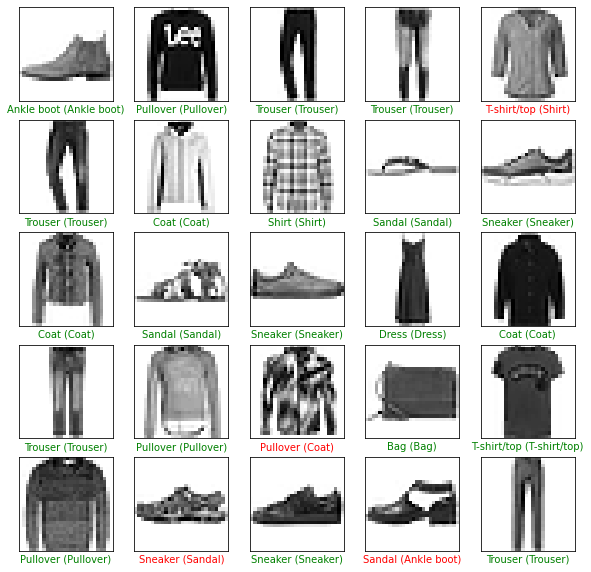

In [24]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_data_1[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = y_test_1[i]
    if predicted_label == true_label:
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=color)

'Pullover'

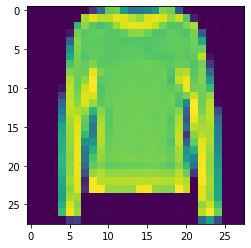

In [25]:
number_predict = 99
predictions = model.predict(test_data_1)
predicted = (predictions[number_predict])
plt.figure()
plt.imshow(test_data_1[number_predict])
class_names[np.argmax(predicted)]